# **Task A**

In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)
student_list = pd.read_csv('Student_List.csv')

In [3]:
student_list.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,Some College,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,Bachelor's,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,Some College,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,High School,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,Some College,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


### **A1. Exploring the dataset** 

#### 1. How many students are there in this dataset?

In [7]:
number_of_students = len(student_list)
number_of_students

1500

#### ANS: 1500 students in this dataset.

#### 2. What is the age range of students in this dataset?

In [10]:
min_age = student_list['Age'].min()
min_age

15

In [11]:
max_age = student_list['Age'].max()
max_age

18

In [12]:
max_age-min_age

3

#### ANS: The age of students in this dataset is between 15 to 18 years old, the range is 3.

#### 3. Identify and discuss the data types of each column in the dataset.

In [15]:
#convert it to dataframes for better format
dtype_df = pd.DataFrame(student_list.dtypes, columns=['Data Type'])
display(dtype_df)

,Data Type
StudentID,int64
Age,int64
ParentalEducation,object
StudyTimeWeekly,float64
Absences,int64
Tutoring,object
ParentalSupport,int64
Extracurricular,object
Sports,object
Music,object


#### ANS: 
#### StudentID, Age, Absences, ParentalSupport are **int64**.  
#### ParentalEducation, Tutoring, Extracurricular, Sports, Music, Volunteering, GradeClass are **object**. 
#### StudyTimeWeekly, GPA are **float64**.

#### 4. GradeClass corresponds to different categories of grades, where, for example, 'A' corresponds to the highest grade (GPA ≥ 3.5) and 'F' corresponds to the lowest grade (GPA < 2.0). Calculate the percentage of students in each grade category.

In [18]:
# value_counts() will get the count of students in each grade category
# normalize = True will get the percentage of students in each grade category
grade_percentage = student_list['GradeClass'].value_counts(normalize = True) * 100
grade_percentage

GradeClass
F    51.000000
D    16.533333
C    16.266667
B    12.200000
A     4.000000
Name: proportion, dtype: float64

#### ANS: 4% of students in 'A' category, the highest grade (GPA >= 3.5), while 12.2% of students in 'B' category. Moreover, 16.267% of students in 'C' category. Furthermore, 'D' category have 16.53% of students. Lastly, 51% of students in 'F' category, the lowest grade, which GPA smaller than 2.0 .

#### 5. Create a pie chart to show the proportion of students in each GradeClass and discuss your observations.

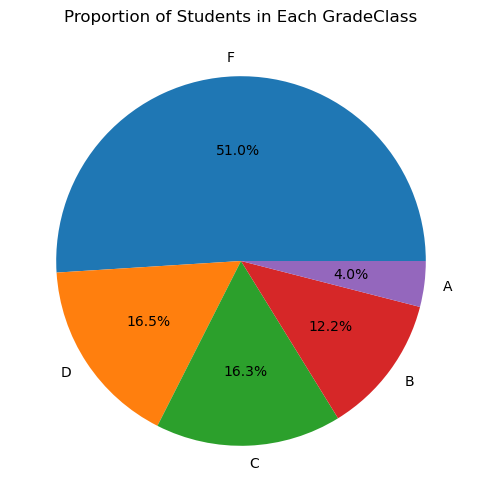

In [21]:
grade_percentage.plot.pie(labels = grade_percentage.index, autopct='%1.1f%%', figsize=(6, 6))
plt.title('Proportion of Students in Each GradeClass')
plt.ylabel('') # hide the y label
plt.show()

#### **Observations**
The largest percentage of students is in grade class F, 51%. Besides that, grade class A has the smallest proportion of students, 4%. Moreover, 16.5% of students in D grade class, while C grade class has a similar percentage with it, 16.3% of students. Lastly, there are 12.2% of students in B garde class. This pie chart shows that, more than half of the students got a failing grade, and only a small minority of students have a good academic performance. 

### **A2. Exploring Parental Education**

#### 1. Determine the frequency of different levels of parental education.
#### ● How many parents have the highest education level (denoted by Higher) in this dataset?

In [25]:
pe_count = student_list['ParentalEducation'].value_counts()
higher_education_count = pe_count.get('Higher', 0)
higher_education_count

77

#### ANS: 77 parents have the highest education level (denoted by Higher) in this dataset.

#### ● How many have no education?

In [28]:
no_education_count = pe_count.get('No Education', 0)
no_education_count

154

#### ANS: 154 parents have no education.

#### ● What is the most common level of parental education?

In [31]:
most_common = pe_count.nlargest(1)
most_common

ParentalEducation
Some College    577
Name: count, dtype: int64

#### ANS: Some College with 577 occurrences is the most common level of parental education.

#### 2. Replace the values in the 'ParentalEducation' column according to the following table:

In [34]:
education = {
    'No Education': 0,
    'High School': 1,
    'Some College': 2,
    "Bachelor's": 3,
    'Higher': 4,    
}
student_list['ParentalEducation'] = student_list['ParentalEducation'].replace(education)
student_list.head()

,StudentID,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1640,18,2,10.318918,5,No,2,No,Yes,No,No,2.655994,C
1,2939,16,3,6.517803,2,Yes,2,No,Yes,No,No,3.474562,B
2,2877,15,2,0.815700,1,No,1,No,No,Yes,Yes,2.806878,C
3,1628,16,1,6.304335,8,No,3,No,No,No,No,2.150546,D
4,2052,15,2,2.516047,14,Yes,3,Yes,No,No,No,2.253871,D


#### 3. Use a boxplot to visualise the distribution of GPA for each level of ParentalEducation. Looking at the boxplot, what can you say about the relationship between parental education and the students’ GPA?

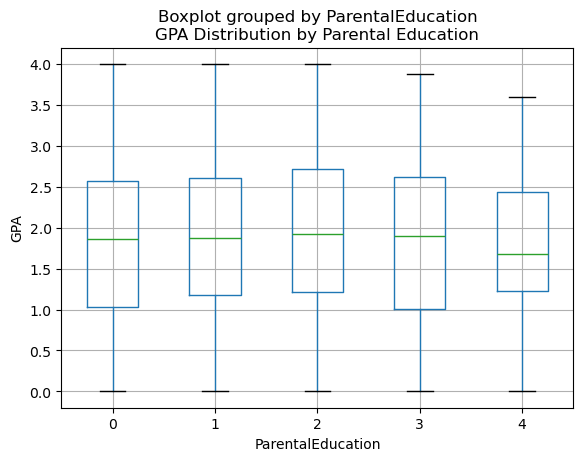

In [36]:
student_list.boxplot(column = 'GPA', by = 'ParentalEducation')
plt.title('GPA Distribution by Parental Education')
plt.xlabel('ParentalEducation')
plt.ylabel('GPA')
plt.show()

#### ANS: There is no strong relationship between parental education and the students' GPA. We can see that the median GPA of each level of parental education is mostly similar, between 1.5 to 2.0 GPA. Besides that, their distribution seems symmetric. Moreover, the range of students' GPA for all level of parental education is between 0 to nearly 4.0, which means students can achieve the highest and also the lowest GPA, regardless the level of parental education. 

### **A3. GPA distribution and Correlation Analysis**
#### 1. Create a histogram to visualise the distribution of GPA. Summarise your observations.

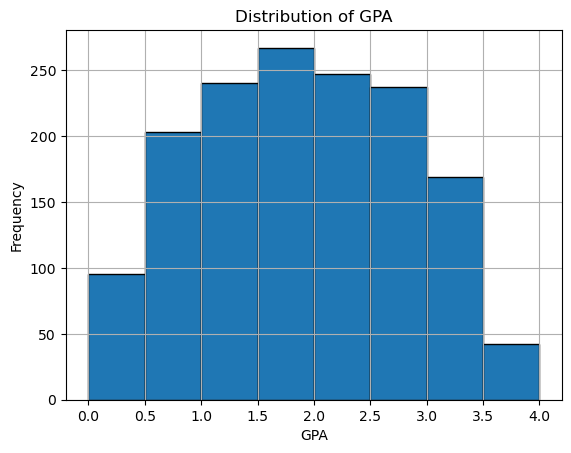

In [39]:
student_list.GPA.hist(bins = 8, edgecolor = 'black')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.show()

#### **Observations**
##### From the graph above, we can observe that the data may have come from a normal distribution (approximately), as the bars roughly follow a symmetrical bell shape, which means this distribution is approximately symmetric around the center, near 2.0 GPA. Furthermore, the data is relatively spread out, with GPAs ranging from 0 to 4.0 GPA. There are some outliers at the end of the distribution, where GPA higher than 3.5. The highest frequency is between 1.5 to 2.0 GPA. Moreover, we can discover that the histogram have a single mode with the highest frequency of GPA.

#### 2. Does a higher weekly study time correlate with better GPA? Use a scatter plot to visualise this relationship and calculate the correlation coefficient.

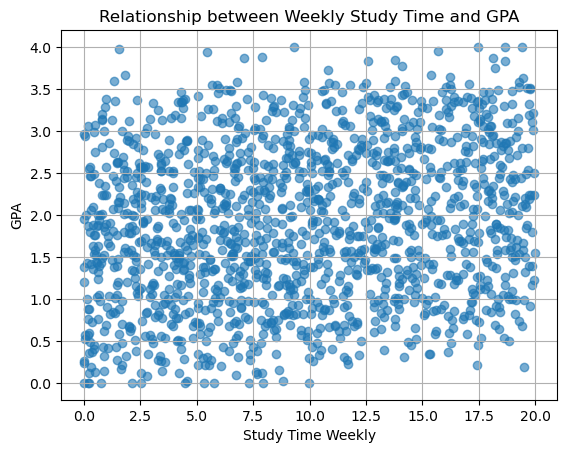

In [42]:
plt.scatter(student_list['StudyTimeWeekly'], student_list['GPA'], alpha = 0.6)
plt.xlabel('Study Time Weekly')
plt.ylabel('GPA')
plt.title('Relationship between Weekly Study Time and GPA')
plt.grid(True)
plt.show()

In [43]:
correlation_coefficient = student_list['StudyTimeWeekly'].corr(student_list['GPA'])
correlation_coefficient

0.1904931303711251

#### ANS: The correlation coefficient is 0.19, near 0, which means no directly relationship between weekly study time and GPA. Therefore, not a higher weekly study time correlate with better GPA. This might becuase every students have different way of study.

#### 3. How about any correlation between absences and GPA? Use a scatter plot to visualise this relationship and calculate the correlation coefficient.

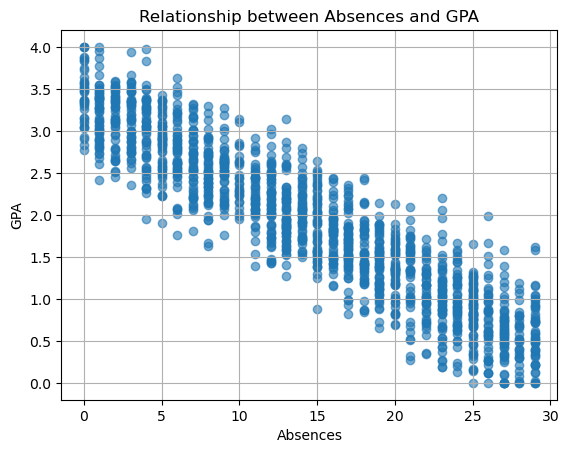

In [46]:
plt.scatter(student_list['Absences'], student_list['GPA'], alpha = 0.6)
plt.xlabel('Absences')
plt.ylabel('GPA')
plt.title('Relationship between Absences and GPA')
plt.grid(True)
plt.show()

In [47]:
correlation = student_list['Absences'].corr(student_list['GPA'])
correlation

-0.9194876943290947

#### ANS: The correlation between Absences and GPA is -0.919, a negative correlation. So, we can know the number of absences increase may lead to the decrease of GPA .

### **A4. Extracurricular Activities**
#### 1. Select a list of students who are involved in Sports, Music, Volunteering and Extracurricular activities. How many students are there? Assume this is called group A.

In [50]:
group_a = student_list[(student_list['Sports'] == 'Yes') &
             (student_list['Music'] == 'Yes') &
             (student_list['Volunteering'] == 'Yes') &
             (student_list['Extracurricular'] == 'Yes')]
number_students_a = len(group_a)
number_students_a

5

#### ANS: 5 students are there in group A.

#### 2. Now Select students who did not involve in any of the above activities. How many students are there? Assume this is called group B.

In [53]:
group_b = student_list[(student_list['Sports'] == 'No') & 
             (student_list['Music'] == 'No') &
             (student_list['Volunteering'] == 'No') &
             (student_list['Extracurricular'] == 'No')]
number_students_b = len(group_b)
number_students_b

432

#### ANS: 432 students are there in group B.

#### 3. Compare the mean GPA of students in group A versus group B. What can you say?

In [56]:
mean_gpa_a = group_a['GPA'].mean()
mean_gpa_a

2.4475262217999996

In [57]:
mean_gpa_b = group_b['GPA'].mean()
mean_gpa_b

1.7312226005532407

#### ANS: The mean GPA of students in group A is higher than group B, which means students who are actively involve in different extracurricular activities have a higher average GPA, their academic perfromance is better than group B. 

### **A5. Exploring Parental Support and Tutoring**
#### 1. Aggregate the data by ParentalSupport and find the mean and median GPA for each group. Also, find the number of students who are 18 years old in each group.

In [60]:
fun = {'GPA':{'mean', 'median'}, 'Age':{'count',lambda x: sum(e == 18 for e in x)}}
gpa_group = student_list.groupby('ParentalSupport').agg(fun).reset_index()
gpa_group.columns = gpa_group.columns.droplevel(0) # drop the top level in column hierarchy
gpa_group.rename(
columns = {
        '':'ParentalSupport',
        'mean':'Mean GPA',
        'median':'Median GPA',
        '<lambda_0>':'18 age',
        'count':'under or over 18 age'},
    inplace = True
)
gpa_group

,ParentalSupport,Mean GPA,Median GPA,18 age,under or over 18 age
0,0,1.521602,1.471672,33,131
1,1,1.735855,1.740455,80,296
2,2,1.845914,1.817007,98,478
3,3,2.068174,2.070669,116,435
4,4,2.227639,2.215516,35,160


#### 2. Plot a side by side bar chart to visualise the mean and median GPA in each level of parental support and discuss your observations. Your bar chart should illustrate each level of parental support as below.

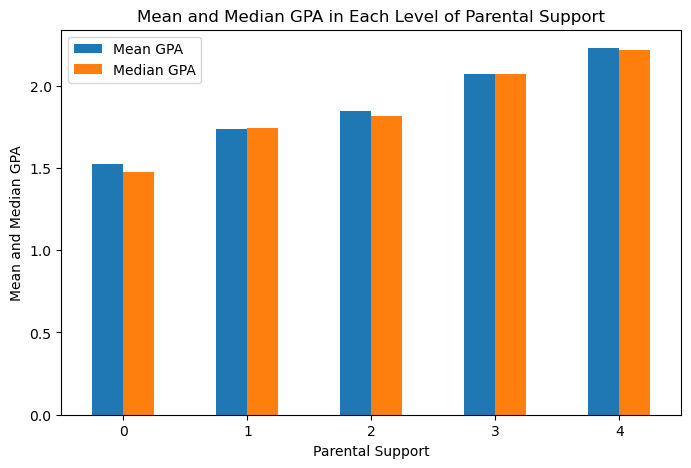

In [62]:
bar = gpa_group[['Mean GPA', 'Median GPA']].plot.bar(figsize=(8,5))
# figsize sets size of plot
bar.set_xticklabels(gpa_group['ParentalSupport'],rotation = 0)
# use values of column 'class' as the x axis labels. Remove this line of code to see what will happen if we do not have this line
plt.xlabel('Parental Support')
plt.ylabel('Mean and Median GPA')
plt.title('Mean and Median GPA in Each Level of Parental Support')
plt.show()

#### Observations
The mean and median GPA will increase with a better parental support. Thus, we know that GPA is correlate with the level of parental support. In most of the level of parental support, the mean and median are same or closer, which shows a balanced distribution. 

#### 3. Calculate the average GPA for students who receive Tutoring versus those who don't. Visualise the results using a barchart and explain what you observe.

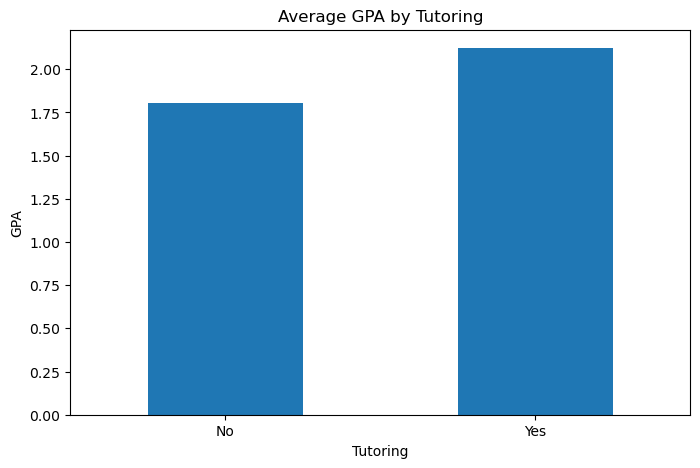

In [65]:
average_gpa_tutoring = student_list.groupby('Tutoring')['GPA'].mean()
bar2 = average_gpa_tutoring.plot.bar(figsize=(8,5))
plt.title('Average GPA by Tutoring')
plt.ylabel('GPA')
plt.xticks(rotation = 0)
plt.show()

#### Observations
From this bar chat, we can observe that students who receive tutoring have a better average of GPA than who don't.